# **FAKHRE-EDDINE MOHAMED AMINE**

### **Importation des libraries**

In [198]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### **Importation du dataset**

In [199]:
DF = pd.read_excel('titanic.xls')

DF.head(10)

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   
7       1         0                           Andrews, Mr. Thomas Jr    male   
8       1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9       1         0                          Artagaveytia, Mr. Ramon    male   

       age  sibsp  parch    ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0     24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2    113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2    113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2    113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2    113781  151.5500  C22 C26        S  NaN    NaN   
5  48.0000      0      0     19952   26.5500      E12        S    3    NaN   
6  63.0000      1      0     13502   77.9583       D7        S   10    NaN   
7  39.0000      0      0    112050    0.0000      A36        S  NaN    NaN   
8  53.0000      2      0     11769   51.4792     C101        S    D    NaN   
9  71.0000      0      0  PC 17609   49.5042      NaN        C  NaN   22.0   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON  
5                     New York, NY  
6                       Hudson, NY  
7                      Belfast, NI  
8              Bayside, Queens, NY  
9              Montevideo, Uruguay

### **Information sur le dataset**

In [200]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### **Les dimensions du dataset**

In [201]:
DF.shape

(1309, 14)

### **Suppression de quelsue colonnes**

In [202]:
DF.drop(['sibsp','name', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

DF

pclass  survived     sex      age
0          1         1  female  29.0000
1          1         1    male   0.9167
2          1         0  female   2.0000
3          1         0    male  30.0000
4          1         0  female  25.0000
...      ...       ...     ...      ...
1304       3         0  female  14.5000
1305       3         0  female      NaN
1306       3         0    male  26.5000
1307       3         0    male  27.0000
1308       3         0    male  29.0000

[1309 rows x 4 columns]

### **Description du dataset**

La description du dataset nous permet de voir les statistiques descriptives des variables quantitatives et qualitatives. Ce qui nous permet d'avoir une idée sur la distribution des données.

In [203]:
DF.describe()

pclass     survived          age
count  1309.000000  1309.000000  1046.000000
mean      2.294882     0.381971    29.881135
std       0.837836     0.486055    14.413500
min       1.000000     0.000000     0.166700
25%       2.000000     0.000000    21.000000
50%       3.000000     0.000000    28.000000
75%       3.000000     1.000000    39.000000
max       3.000000     1.000000    80.000000

### **Les valeurs manquantes**

Ici on peut voir le nombre de valeurs manquantes dans la colonne 'age' et son pourcentage par rapport au nombre total de lignes.

In [204]:
print('le nbr de NaN dans la cln age: ', DF['age'].isnull().sum(), '\nle pourcentage de NaN dans la cln age: ', (DF['age'].isnull().sum()/len(DF))*100)

le nbr de NaN dans la cln age:  263 
le pourcentage de NaN dans la cln age:  20.091673032849503


Puisque le pourcentage de valeurs manquantes (20.09%) est superieur à 5%, on ne peut pas supprimer les lignes qui contiennent des valeurs manquantes. On va donc remplacer les valeurs manquantes par la moyenne de la colonne.

In [205]:
DF['age'].fillna(DF['age'].mean(), inplace=True)

DF

pclass  survived     sex        age
0          1         1  female  29.000000
1          1         1    male   0.916700
2          1         0  female   2.000000
3          1         0    male  30.000000
4          1         0  female  25.000000
...      ...       ...     ...        ...
1304       3         0  female  14.500000
1305       3         0  female  29.881135
1306       3         0    male  26.500000
1307       3         0    male  27.000000
1308       3         0    male  29.000000

[1309 rows x 4 columns]

Ici on compte le nombre de ligne pour chaque valeur de la colonne 'pclass'.

In [206]:
DF['pclass'].value_counts().sort_index()

pclass
1    323
2    277
3    709
Name: count, dtype: int64

On compte combien des passagers ont survécu par 'pclass'

In [207]:
DF.groupby(['pclass', 'survived'])['pclass'].count()

pclass  survived
1       0           123
        1           200
2       0           158
        1           119
3       0           528
        1           181
Name: pclass, dtype: int64

Histogramme de la colonne 'age'.

<Axes: >

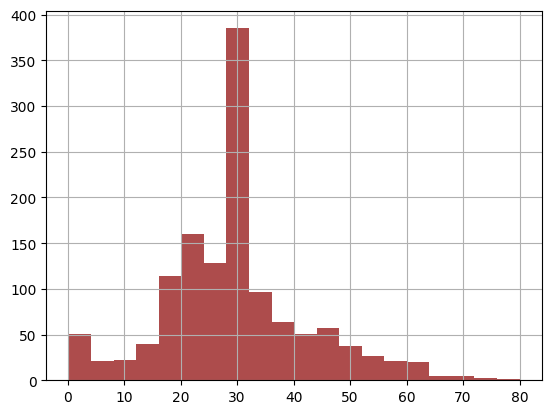

In [208]:
DF['age'].hist(bins=20, color='darkred', alpha=0.7)

Ici on affiche la moyenne de l'age pour chaque valeur de la colonne 'sex'.

In [209]:
DF[['age', 'sex']].groupby(['sex']).mean()

age
sex              
female  28.886935
male    30.430716

Ici on affiche la moyenne de 'survived' pour chaque valeur de la colonne 'sex'.

In [210]:
DF[['survived', 'sex']].groupby(['sex']).mean()

survived
sex             
female  0.727468
male    0.190985

Ici on encode les valeurs qualitatives de la colonne 'sex' en valeurs quantitatives.

In [211]:
encoder = LabelEncoder()

DF['sex'] = encoder.fit_transform(DF['sex'])

DF

pclass  survived  sex        age
0          1         1    0  29.000000
1          1         1    1   0.916700
2          1         0    0   2.000000
3          1         0    1  30.000000
4          1         0    0  25.000000
...      ...       ...  ...        ...
1304       3         0    0  14.500000
1305       3         0    0  29.881135
1306       3         0    1  26.500000
1307       3         0    1  27.000000
1308       3         0    1  29.000000

[1309 rows x 4 columns]

### **Separation du dataset**
Premierement, on sépare le dataset en deux parties: X et y. X contient les variables explicatives et y contient la variable à expliquer.

In [212]:
X = DF.drop(['survived'], axis=1)
y = DF['survived']

Après, on sépare le dataset en deux parties: train et test. train contient 80% des données et test contient 20% des données.

La methode train_test_split contient un paramètre random_state qui permet de fixer le seed du générateur de nombres aléatoires utilisé pour la séparation du dataset. Ce qui permet de reproduire les mêmes résultats. On va choisir la valeur de random_state qui donne les meilleurs résultats pour chaque modèle.

##### **Naive bayes**

Le choix de la valeur de random_state est très important. Notre choix n'est pas aléatoire. Ca étè trouvé par itération. On a essayé des valeurs de 1 à 9999 et on a choisi la valeur qui donne les meilleurs résultats.

Puis on entraine les modèles sur le dataset train et on teste les modèles sur le dataset test.

In [213]:
# SUPPRIMER LES COMMENTAIRES POUR COMPARER LES MATRICES DE CONFUSION A LA FIN

""" allConfusionMatrixes = {}
predictions = {} """

' allConfusionMatrixes = {}\npredictions = {} '

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3352)

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

""" predictions['Naive Bayes'] = [y_test, y_pred] """

" predictions['Naive Bayes'] = [y_test, y_pred] "

**Matrice de confusion** 

Pour mesurer la performance des modèles, on utilise la matrice de confusion.

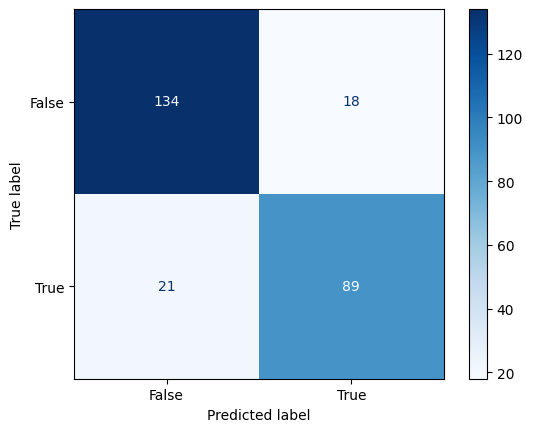

In [215]:
cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, display_labels=["False", "True"], cmap=plt.cm.Blues)

""" allConfusionMatrixes['Naive Bayes'] = disp """

plt.show()

**Metriques de performance** \
Cette matrice nous permet de calculer le taux d'erreur équilibré (BER), la précision, le rappel, le score F1, l'accuracy et le score AUC. \
Balanced Error Rate (BER) est une mesure de performance qui est utilisée pour évaluer les modèles de classification binaire. \
Accuracy signifie le nombre de prédictions correctes faites par le modèle sur toutes les prédictions. \
Precision est la proportion de prédictions positives qui sont correctes. \
Recall est la proportion de vrais positifs qui sont correctement identifiés. \
F1 Score est la moyenne harmonique de la précision et du rappel. \
AUC Score est la mesure de la capacité d'un modèle à distinguer entre les classes positives et négatives.

In [216]:
BER = 1 - (1/2 * ((cm[0][0] / (cm[0][0] + cm[1][0])) + (cm[1][1] / (cm[1][1] + cm[0][1]))))

precision = metrics.precision_score(y_test, y_pred, average='macro')

recall = metrics.recall_score(y_test, y_pred, average='macro')

f1_score = metrics.f1_score(y_test, y_pred, average='macro')

accuracy = metrics.accuracy_score(y_test, y_pred)

auc_score = metrics.roc_auc_score(y_test, y_pred)

print('Balanced Error Rate: ', BER)
print('Accuracy:            ', accuracy)
print('Precision:           ', precision)
print('Recall:              ', recall)
print('F1 Score:            ', f1_score)
print('AUC Score:           ', auc_score)

Balanced Error Rate:  0.15185408501658126
Accuracy:             0.851145038167939
Precision:            0.8481459149834187
Recall:               0.845334928229665
F1 Score:             0.8466203335384801
AUC Score:            0.845334928229665


La courbe ROC est une courbe de probabilité qui trace le taux de vrais positifs en fonction du taux de faux positifs.

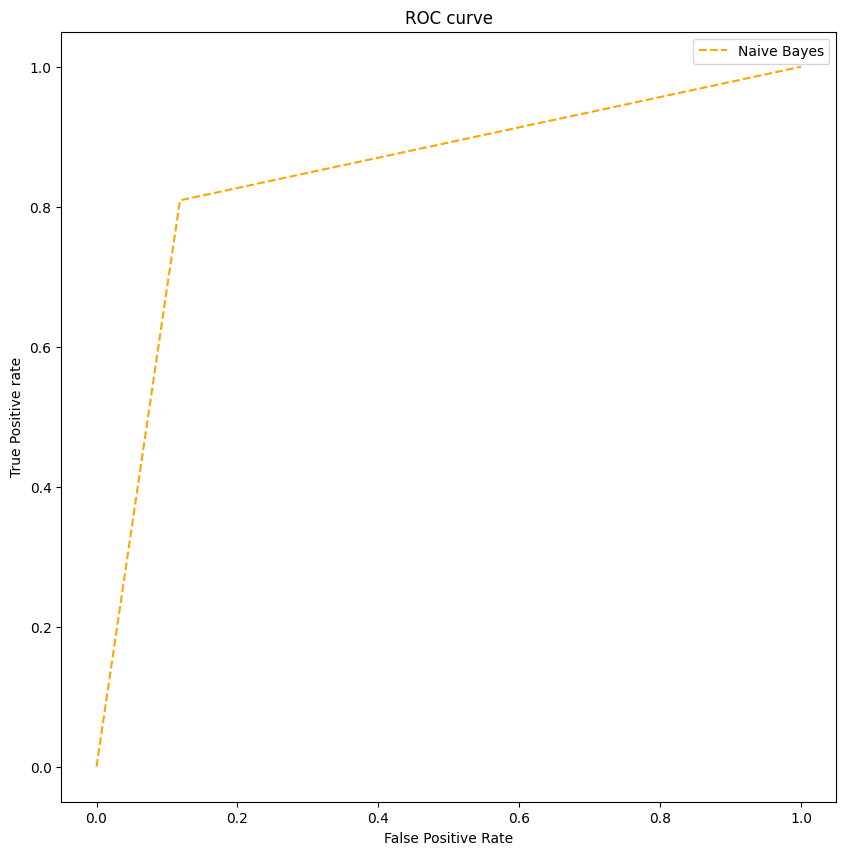

In [217]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred, pos_label=1)

# plot roc curves
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

##### **Decision Tree**
La meme chose ici, on a essayé des valeurs de 1 à 9999 pour random state et on a choisi la valeur qui donne les meilleurs résultats.

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9895)

model = DecisionTreeClassifier()
        
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

""" predictions['Decision Tree'] = [y_test, y_pred] """

" predictions['Decision Tree'] = [y_test, y_pred] "

**Matrice de confusion**

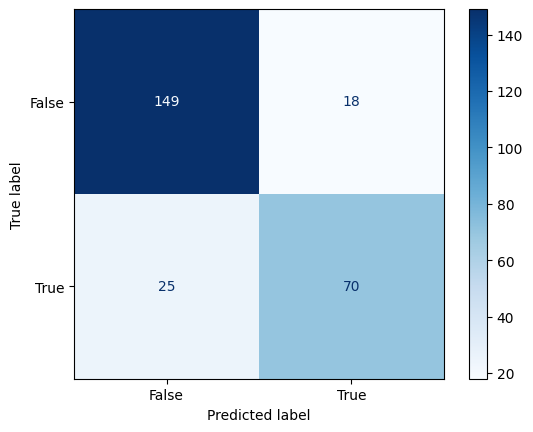

In [219]:
cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, display_labels=["False", "True"], cmap=plt.cm.Blues)

""" allConfusionMatrixes['Decision Tree'] = disp """

plt.show()

**Metriques de performance**

In [220]:
BER = 1 - (1/2 * ((cm[0][0] / (cm[0][0] + cm[1][0])) + (cm[1][1] / (cm[1][1] + cm[0][1]))))

precision = metrics.precision_score(y_test, y_pred, average='macro')

recall = metrics.recall_score(y_test, y_pred, average='macro')

f1_score = metrics.f1_score(y_test, y_pred, average='macro')

accuracy = metrics.accuracy_score(y_test, y_pred)

auc_score = metrics.roc_auc_score(y_test, y_pred)

print('Balanced Error Rate: ', BER)
print('Accuracy:            ', accuracy)
print('Precision:           ', precision)
print('Recall:              ', recall)
print('F1 Score:            ', f1_score)
print('AUC Score:           ', auc_score)

Balanced Error Rate:  0.17411180773249746
Accuracy:             0.8358778625954199
Precision:            0.8258881922675025
Recall:               0.8145288370627166
F1 Score:             0.8194638078297517
AUC Score:            0.8145288370627167


**L'affichage de l'arbre de décision**

Ce block affiche l'arbre de décision. On peut voir les conditions qui permettent de classer les données. (Ca prend du temps pour s'afficher, vous pouzez l'exécuter si vous voulez voir l'arbre de décision)

In [221]:
plt.figure(figsize=(100, 100))
plot_tree(model, filled=True, rounded=True, class_names=["False", "True"], feature_names=X.columns, proportion=True)

[Text(0.41407590051457976, 0.9722222222222222, 'sex <= 0.5\ngini = 0.474\nsamples = 100.0%\nvalue = [0.613, 0.387]\nclass = False'),
 Text(0.1786556603773585, 0.9166666666666666, 'pclass <= 2.5\ngini = 0.397\nsamples = 35.6%\nvalue = [0.273, 0.727]\nclass = True'),
 Text(0.06775300171526587, 0.8611111111111112, 'pclass <= 1.5\ngini = 0.141\nsamples = 18.7%\nvalue = [0.077, 0.923]\nclass = True'),
 Text(0.02058319039451115, 0.8055555555555556, 'age <= 8.0\ngini = 0.087\nsamples = 10.5%\nvalue = [0.045, 0.955]\nclass = True'),
 Text(0.0137221269296741, 0.75, 'gini = 0.0\nsamples = 0.1%\nvalue = [1.0, 0.0]\nclass = False'),
 Text(0.0274442538593482, 0.75, 'age <= 62.5\ngini = 0.071\nsamples = 10.4%\nvalue = [0.037, 0.963]\nclass = True'),
 Text(0.0137221269296741, 0.6944444444444444, 'age <= 24.5\ngini = 0.056\nsamples = 10.0%\nvalue = [0.029, 0.971]\nclass = True'),
 Text(0.00686106346483705, 0.6388888888888888, 'gini = 0.0\nsamples = 2.2%\nvalue = [0.0, 1.0]\nclass = True'),
 Text(0.020

**La courbe ROC**

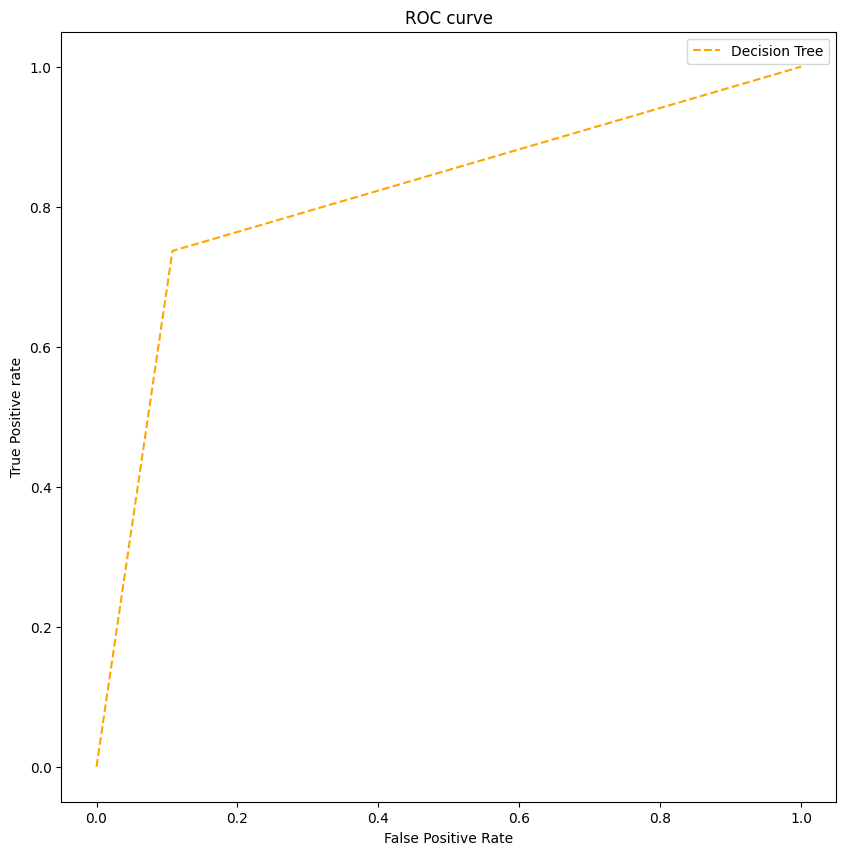

In [222]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred, pos_label=1)

# plot roc curves
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Decision Tree')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

##### **SVM**

On peux faire la meme chose pour SVM mais on va utiliser la valeur de random_state par défaut. Puisque le modele est lourd et prend du temps pour s'entrainer.

Le choix du kernel est très important. On a essayé les kernels: linear, poly, rbf, sigmoid et on a choisi le kernel qui donne les meilleurs résultats. Aussi les données sont étalées dans une ligne droite, donc le kernel linear est le plus adapté.

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = svm.SVC(kernel='linear')
        
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

""" predictions['SVM'] = [y_test, y_pred] """

" predictions['SVM'] = [y_test, y_pred] "

**Matrice de confusion**

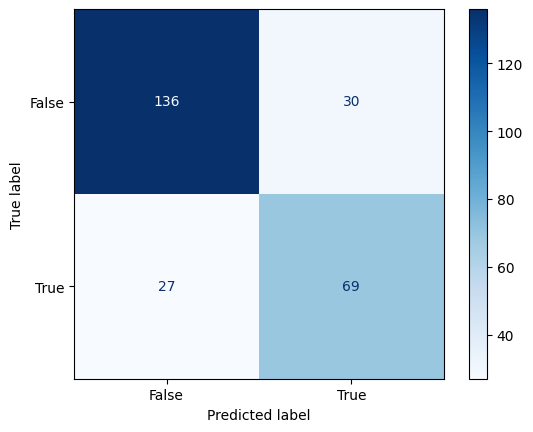

In [224]:
cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, display_labels=["False", "True"], cmap=plt.cm.Blues)

""" allConfusionMatrixes['SVM'] = disp """

plt.show()

**Metriques de performance**

In [225]:
BER = 1 - (1/2 * ((cm[0][0] / (cm[0][0] + cm[1][0])) + (cm[1][1] / (cm[1][1] + cm[0][1]))))

precision = metrics.precision_score(y_test, y_pred, average='macro')

recall = metrics.recall_score(y_test, y_pred, average='macro')

f1_score = metrics.f1_score(y_test, y_pred, average='macro')

accuracy = metrics.accuracy_score(y_test, y_pred)

auc_score = metrics.roc_auc_score(y_test, y_pred)

print('Balanced Error Rate: ', BER)
print('Accuracy:            ', accuracy)
print('Precision:           ', precision)
print('Recall:              ', recall)
print('F1 Score:            ', f1_score)
print('AUC Score:           ', auc_score)

Balanced Error Rate:  0.23433723740472212
Accuracy:             0.7824427480916031
Precision:            0.7656627625952779
Recall:               0.7690135542168675
F1 Score:             0.7672200140285246
AUC Score:            0.7690135542168675


**La courbe ROC**

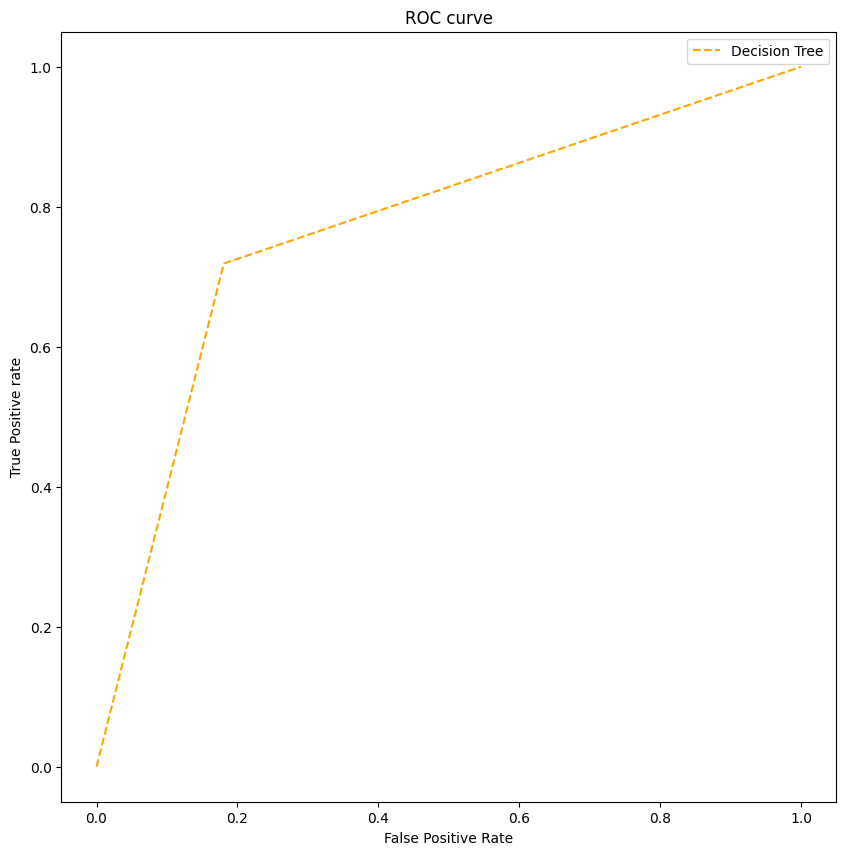

In [226]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred, pos_label=1)

# plot roc curves
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Decision Tree')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

**Visualisation des vecteurs de support**
La fonction plot_training_data_with_decision_boundary permet de visualiser les vecteurs de support entre deux variables explicatives. On peut voir les vecteurs de support en noir.

In [227]:
def plot_training_data_with_decision_boundary(kernel, X, y, columns: list, figsize=(10, 60)):
    # Train the SVC
    clf = svm.SVC(kernel=kernel).fit(X, y)

    # Settings for plotting
    _, ax = plt.subplots(figsize=figsize)
    x_min, x_max, y_min, y_max = X[columns[0]].min() - 1, X[columns[0]].max() + 1, -1, X[columns[1]].max() + 1
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(X[columns[0]], X[columns[1]], c=y, s=150, edgecolors="k")
    ax.legend(loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

La fonction getCombinations permet de générer toutes les combinaisons possibles de deux variables explicatives.

In [228]:
def getCombinations(seq):
    combinations = list()
    for i in range(0,len(seq)):
        for j in range(i+1,len(seq)):
            combinations.append([seq[i],seq[j]])
    return combinations

In [229]:
columnsCombinations = getCombinations(X_train.columns)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


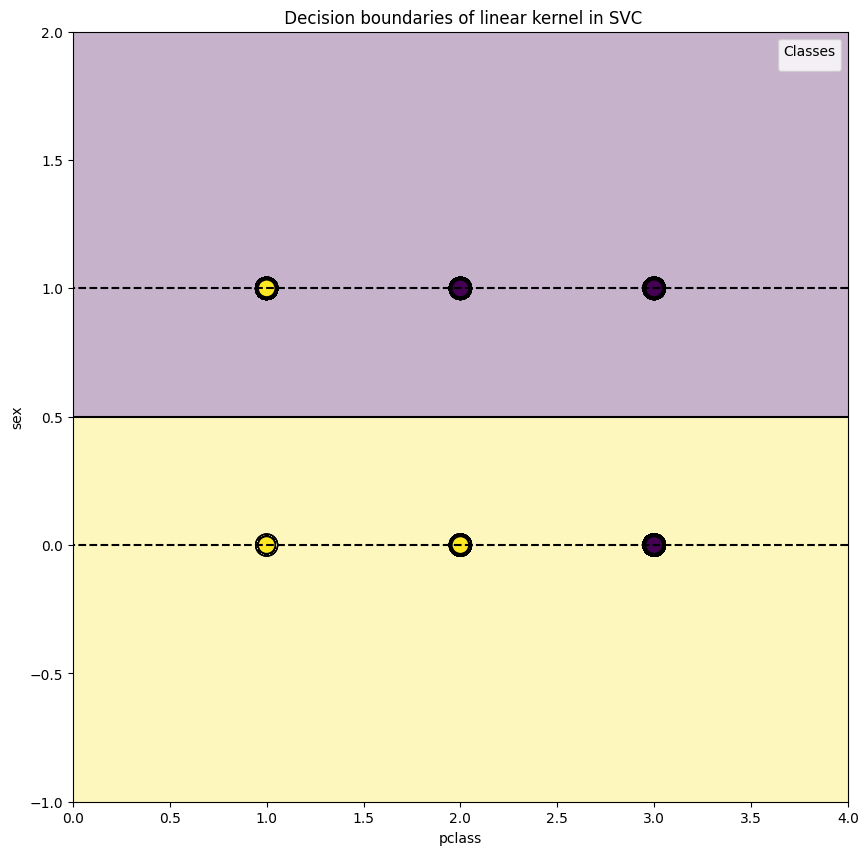

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


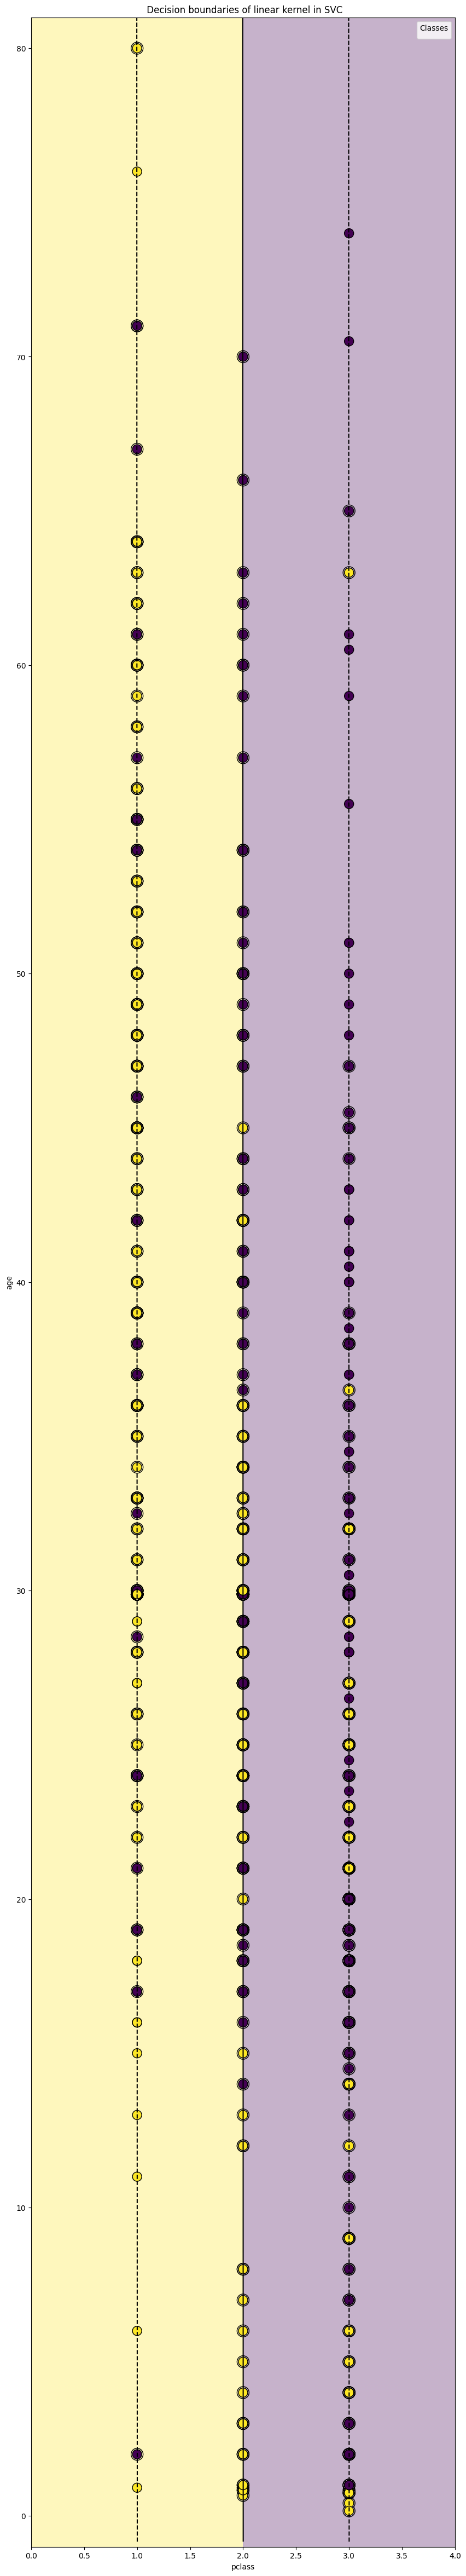

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


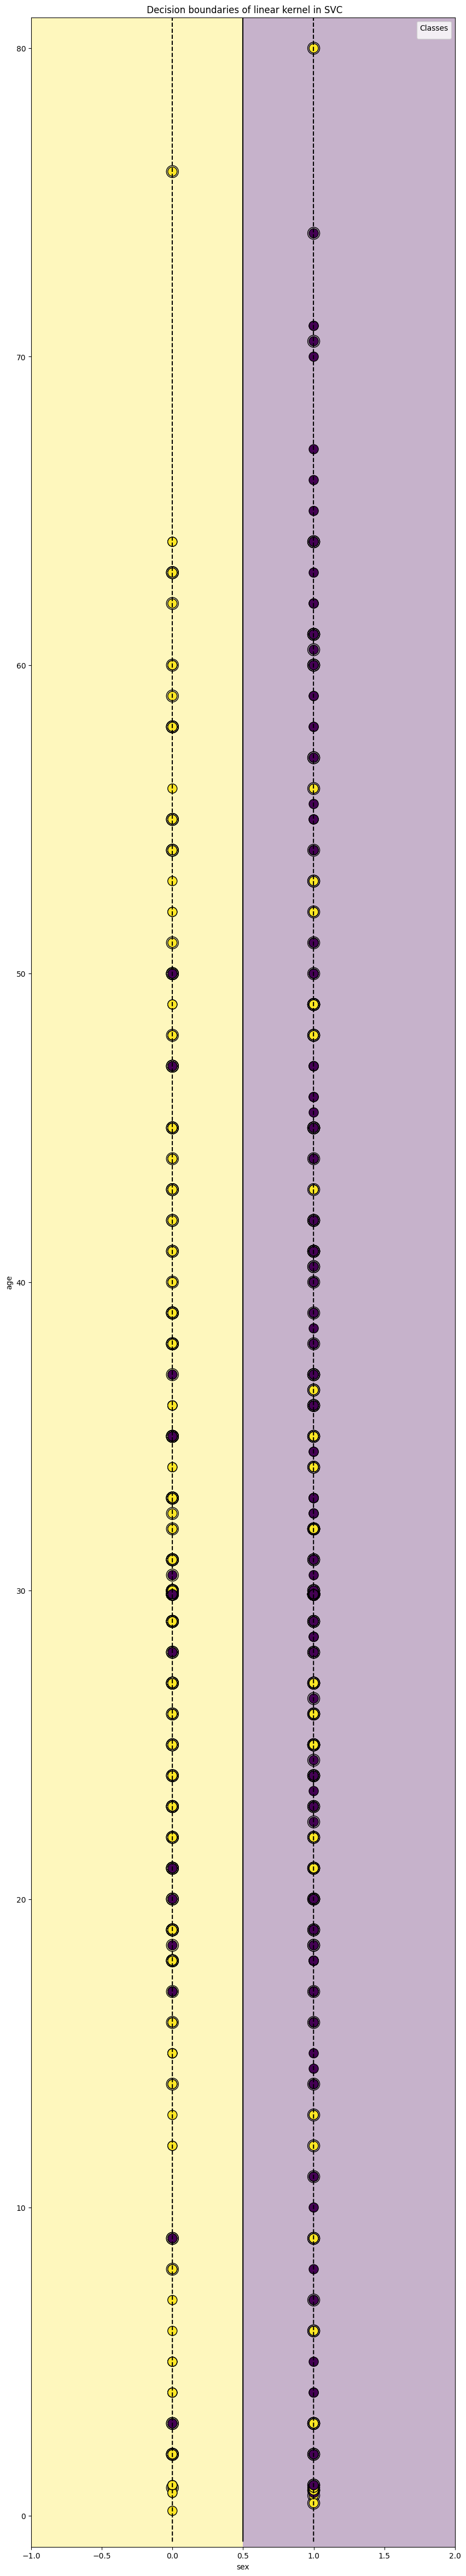

In [230]:
X = None
y = y_train

for columns in columnsCombinations:
    X = X_train[columns]
    if columns == ['pclass', 'sex']:
        plot_training_data_with_decision_boundary("linear", X, y, columns, figsize=(10, 10))
        continue
    plot_training_data_with_decision_boundary("linear", X, y, columns)


### **Logistic regression**

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8229)

model = LogisticRegression()
        
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

""" predictions['Logistic Regression'] = [y_test, y_pred] """

" predictions['Logistic Regression'] = [y_test, y_pred] "

**Matrice de confusion**

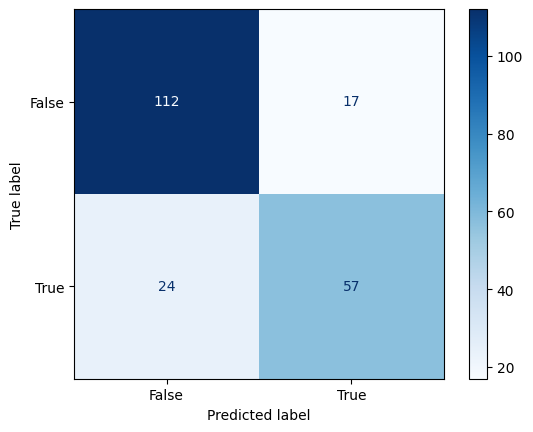

In [232]:
cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, display_labels=["False", "True"], cmap=plt.cm.Blues)

""" allConfusionMatrixes['Logistic Regression'] = disp """

plt.show()

**Metriques de performance**

In [233]:
BER = 1 - (1/2 * ((cm[0][0] / (cm[0][0] + cm[1][0])) + (cm[1][1] / (cm[1][1] + cm[0][1]))))

precision = metrics.precision_score(y_test, y_pred, average='macro')

recall = metrics.recall_score(y_test, y_pred, average='macro')

f1_score = metrics.f1_score(y_test, y_pred, average='macro')

accuracy = metrics.accuracy_score(y_test, y_pred)

auc_score = metrics.roc_auc_score(y_test, y_pred)

print('Balanced Error Rate: ', BER)
print('Accuracy:            ', accuracy)
print('Precision:           ', precision)
print('Recall:              ', recall)
print('F1 Score:            ', f1_score)
print('AUC Score:           ', auc_score)

Balanced Error Rate:  0.20310015898251188
Accuracy:             0.8047619047619048
Precision:            0.7968998410174881
Recall:               0.7859603789836348
F1 Score:             0.7903834449178333
AUC Score:            0.7859603789836348


**La courbe ROC**

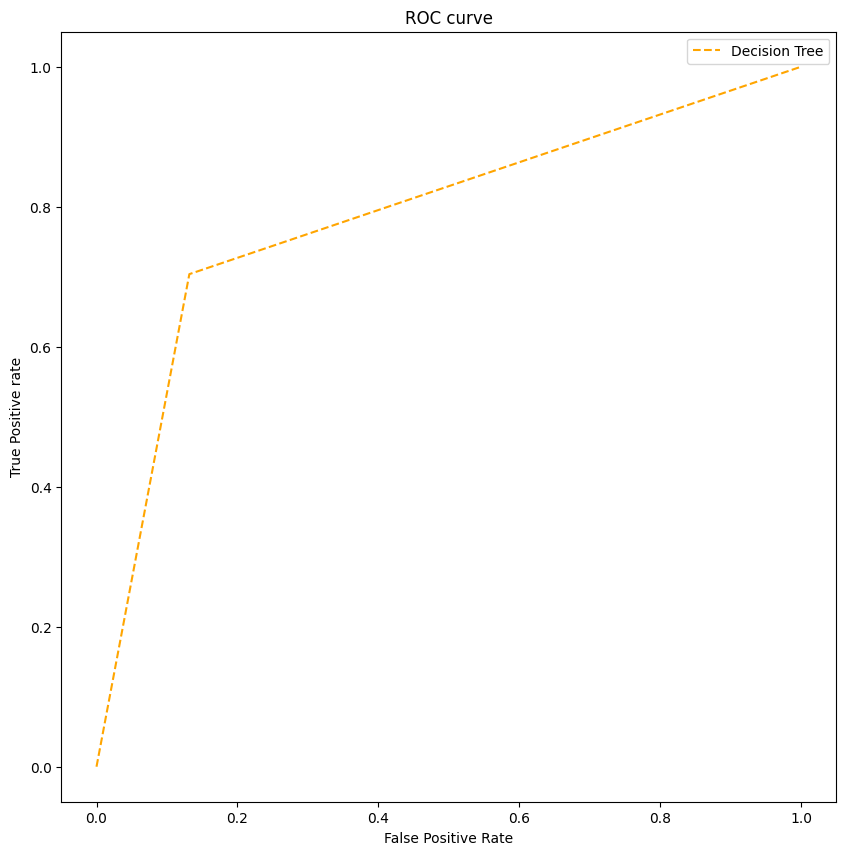

In [234]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred, pos_label=1)

# plot roc curves
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Decision Tree')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

### **KNN**

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7394)

model = KNeighborsClassifier()
        
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

""" predictions['KNN'] = [y_test, y_pred] """

" predictions['KNN'] = [y_test, y_pred] "

**Matrice de confusion**

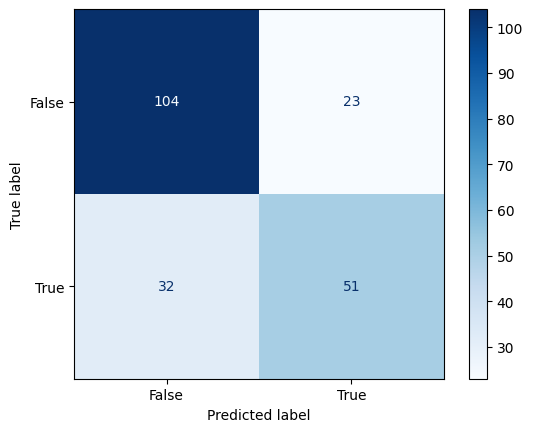

In [236]:
cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, display_labels=["False", "True"], cmap=plt.cm.Blues)

""" allConfusionMatrixes['KNN'] = disp """

plt.show()

**Metriques de performance**

In [237]:
BER = 1 - (1/2 * ((cm[0][0] / (cm[0][0] + cm[1][0])) + (cm[1][1] / (cm[1][1] + cm[0][1]))))

precision = metrics.precision_score(y_test, y_pred, average='macro')

recall = metrics.recall_score(y_test, y_pred, average='macro')

f1_score = metrics.f1_score(y_test, y_pred, average='macro')

accuracy = metrics.accuracy_score(y_test, y_pred)

auc_score = metrics.roc_auc_score(y_test, y_pred)

print('Balanced Error Rate: ', BER)
print('Accuracy:            ', accuracy)
print('Precision:           ', precision)
print('Recall:              ', recall)
print('F1 Score:            ', f1_score)
print('AUC Score:           ', auc_score)

Balanced Error Rate:  0.2730524642289349
Accuracy:             0.7380952380952381
Precision:            0.7269475357710651
Recall:               0.7166777345602884
F1 Score:             0.7202780266886246
AUC Score:            0.7166777345602885


**La courbe ROC**

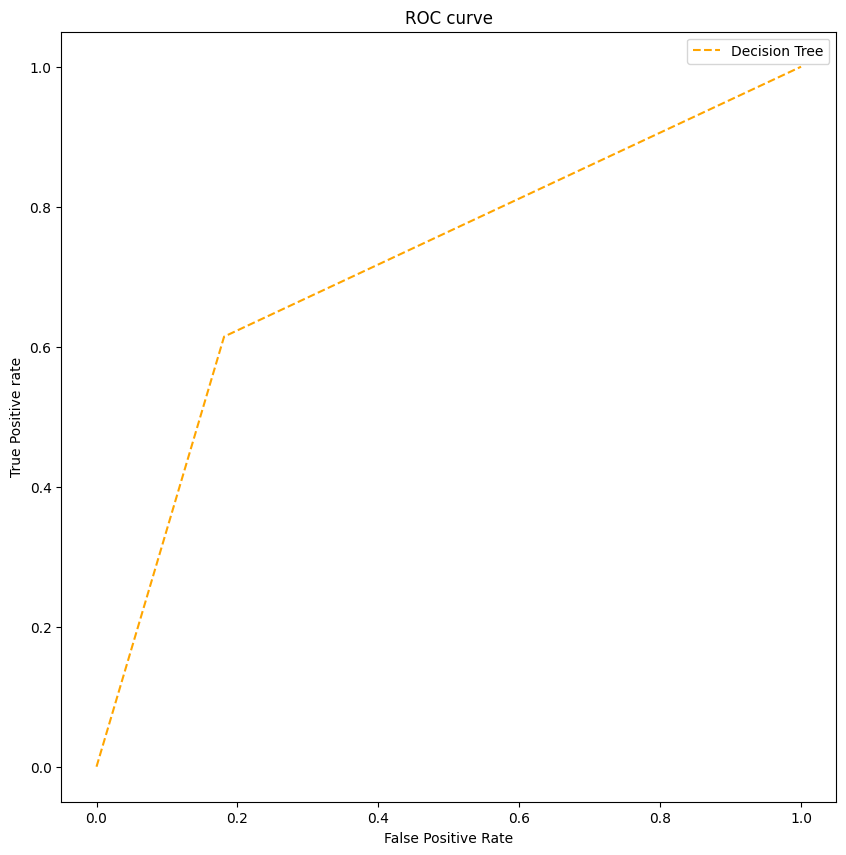

In [238]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred, pos_label=1)

# plot roc curves
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Decision Tree')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

### **Random forest**

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9895)

model = RandomForestClassifier()
        
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

""" predictions['Random Forest'] = [y_test, y_pred] """

" predictions['Random Forest'] = [y_test, y_pred] "

**Matrice de confusion**

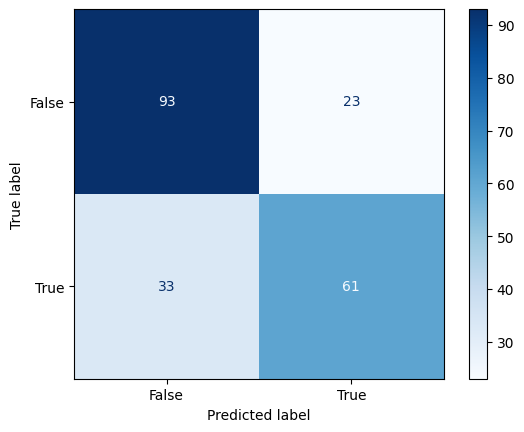

In [240]:
cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, display_labels=["False", "True"], cmap=plt.cm.Blues)

""" allConfusionMatrixes['Random Forest'] = disp """

plt.show()

**Metriques de performance**

In [241]:
BER = 1 - (1/2 * ((cm[0][0] / (cm[0][0] + cm[1][0])) + (cm[1][1] / (cm[1][1] + cm[0][1]))))

precision = metrics.precision_score(y_test, y_pred, average='macro')

recall = metrics.recall_score(y_test, y_pred, average='macro')

f1_score = metrics.f1_score(y_test, y_pred, average='macro')

accuracy = metrics.accuracy_score(y_test, y_pred)

auc_score = metrics.roc_auc_score(y_test, y_pred)

print('Balanced Error Rate: ', BER)
print('Accuracy:            ', accuracy)
print('Precision:           ', precision)
print('Recall:              ', recall)
print('F1 Score:            ', f1_score)
print('AUC Score:           ', auc_score)

Balanced Error Rate:  0.2678571428571428
Accuracy:             0.7333333333333333
Precision:            0.7321428571428572
Recall:               0.7253301540719002
F1 Score:             0.7269941498746402
AUC Score:            0.7253301540719003


**La courbe ROC**

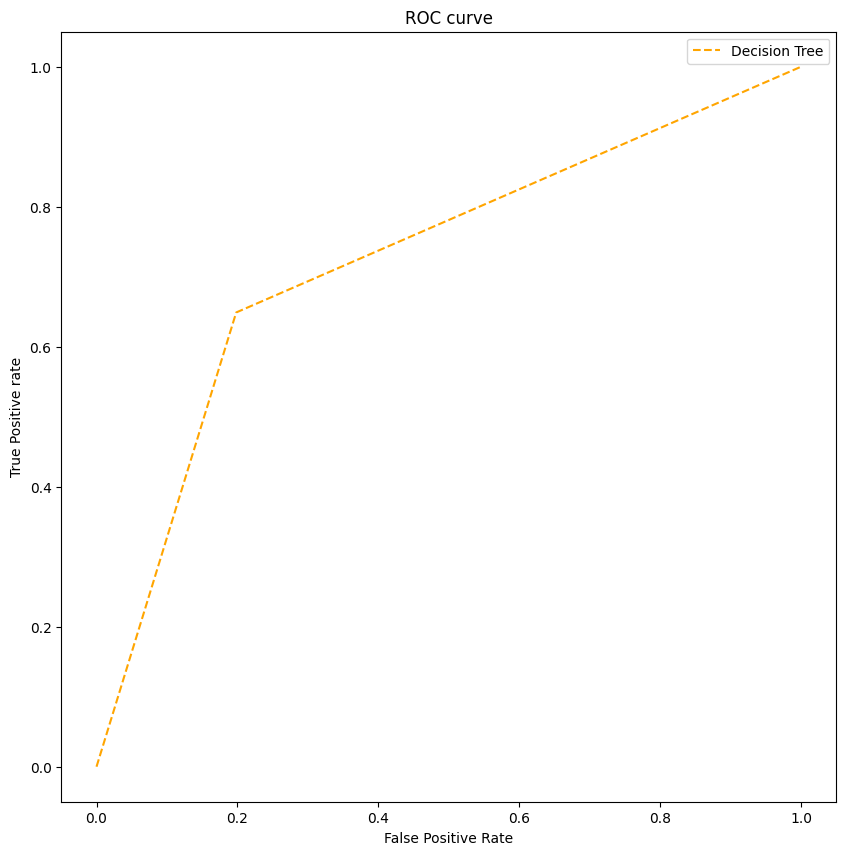

In [242]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred, pos_label=1)

# plot roc curves
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Decision Tree')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [243]:
""" for i, (key, value) in enumerate(predictions.items()):
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=value[0], y_pred=value[1], display_labels=["False", "True"], cmap=plt.cm.Blues)

    plt.plot(value, label=key)
    plt.title(key)
    plt.show() """

' for i, (key, value) in enumerate(predictions.items()):\n    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=value[0], y_pred=value[1], display_labels=["False", "True"], cmap=plt.cm.Blues)\n\n    plt.plot(value, label=key)\n    plt.title(key)\n    plt.show() '

In [244]:
# LE SUIVANT EST LE PROCESSUS DE RECHERCHE DU MEILLEUR RANDOM STATE POUR UN ALGORITHM DONNE. LE PROCCESSUS N'EST PAS LE MEILLEUR, MAIS IL DONNE UN RESULTAT ACCEPTABLE

""" Best_Accuracy = 0  
Best_precision = 0
Best_recall = 0
Best_f1_score = 0
Best_auc_score = 0
Best_BER = 0
Best_model = None
best_iter = 0

for i in range(1, 9999):
    print('iter: ', i, '\n')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    model = <TON ALGORITHM>
            
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    cm = metrics.confusion_matrix(y_test, y_pred)

    BER = 1 - (1/2 * ((cm[0][0] / (cm[0][0] + cm[1][0])) + (cm[1][1] / (cm[1][1] + cm[0][1]))))

    precision = metrics.precision_score(y_test, y_pred, average='macro')

    recall = metrics.recall_score(y_test, y_pred, average='macro')

    f1_score = metrics.f1_score(y_test, y_pred, average='macro')

    accuracy = metrics.accuracy_score(y_test, y_pred)

    auc_score = metrics.roc_auc_score(y_test, y_pred)

    if accuracy > Best_Accuracy or precision > Best_precision or recall > Best_recall or f1_score > Best_f1_score or auc_score > Best_auc_score or BER < Best_BER:
        Best_Accuracy = accuracy
        Best_precision = precision
        Best_recall = recall
        Best_f1_score = f1_score
        Best_auc_score = auc_score
        Best_BER = BER
        Best_model = model
        best_iter = i
        print('Model replaced \n\n')

print(best_iter) """

" Best_Accuracy = 0  \nBest_precision = 0\nBest_recall = 0\nBest_f1_score = 0\nBest_auc_score = 0\nBest_BER = 0\nBest_model = None\nbest_iter = 0\n\nfor i in range(1, 9999):\n    print('iter: ', i, '\n')\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)\n\n    model = <TON ALGORITHM>\n            \n    model.fit(X_train, y_train)\n\n    y_pred = model.predict(X_test)\n\n    cm = metrics.confusion_matrix(y_test, y_pred)\n\n    BER = 1 - (1/2 * ((cm[0][0] / (cm[0][0] + cm[1][0])) + (cm[1][1] / (cm[1][1] + cm[0][1]))))\n\n    precision = metrics.precision_score(y_test, y_pred, average='macro')\n\n    recall = metrics.recall_score(y_test, y_pred, average='macro')\n\n    f1_score = metrics.f1_score(y_test, y_pred, average='macro')\n\n    accuracy = metrics.accuracy_score(y_test, y_pred)\n\n    auc_score = metrics.roc_auc_score(y_test, y_pred)\n\n    if accuracy > Best_Accuracy or precision > Best_precision or recall > Best_recall or f1_score > Bes

### **Conclusion**

Sur la base des mesures d'évaluation des six algorithmes d'apprentissage automatique appliqués à l'ensemble de données Titanic, il est évident que Naive Bayes est le plus performant dans l'ensemble, affichant le taux d'erreur équilibré le plus bas (0,15) et la précision la plus élevée (85,11 %). Naive Bayes fait également preuve d'une précision, d'un rappel, d'un score F1 et d'un score AUC élevés, ce qui témoigne de la solidité de ses performances sur de nombreux critères. L'algorithme de l'arbre de décision suit de près, avec des mesures compétitives dans tous les domaines. La régression logistique est également performante, avec des résultats équilibrés. Cependant, les algorithmes SVM, KNN et Random Forest affichent des performances comparativement plus faibles, avec des taux d'erreur équilibrés plus élevés et une précision plus faible. Ces résultats suggèrent que pour l'ensemble de données donné, Naive Bayes est l'algorithme le plus approprié, suivi par Decision Tree et Logistic Regression, tandis que SVM, KNN et Random Forest peuvent nécessiter un réglage plus approfondi ou l'examen d'autres approches.

### **References**

Ar. Basics of Feature Selection with Python. Kaggle. Published October 31, 2020. https://www.kaggle.com/code/ar2017/basics-of-feature-selection-with-python 

Bbloggsbott. Feature selection - correlation and P-value. Kaggle. Published April 25, 2022. https://www.kaggle.com/code/bbloggsbott/feature-selection-correlation-and-p-value 

Medium. https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7 

sklearn.naive_bayes.GaussianNB. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html 

Sklearn.tree.DecisionTreeClassifier. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 

Sklearn.svm.SVC. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

sklearn.linear_model.LogisticRegression. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

sklearn.neighbors.KNeighborsClassifier. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

sklearn.ensemble.RandomForestClassifier. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html